In [54]:
%matplotlib inline
#Import basic packages
import numpy as np 
import pandas as pd
import matplotlib as matplot
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
from IPython.display import display
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.datasets import make_imbalance
from sklearn.preprocessing import StandardScaler

In [55]:
mydataset = pd.read_csv('creditcard.csv')

In [47]:
mydataset.shape

(284807, 31)

In [29]:
mydataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [30]:
mydataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


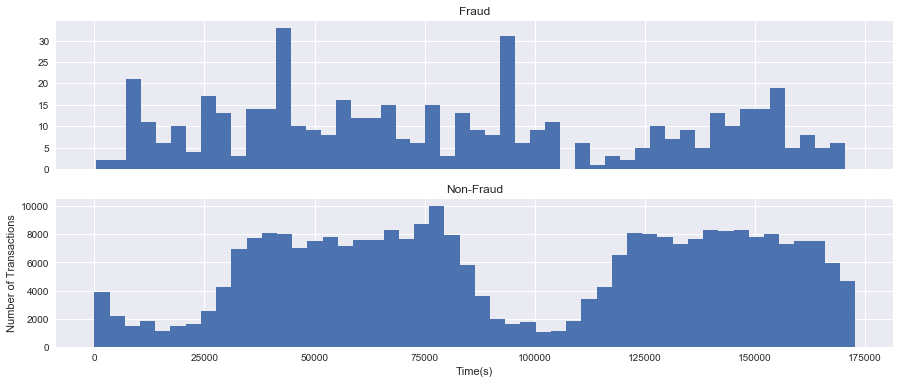

In [31]:
f, (x, y) = plt.subplots(2, 1, sharex=True, figsize=(15,6))
bins = 50
x.hist(mydataset.Time[mydataset.Class == 1], bins = bins)
x.set_title('Fraud')
y.hist(mydataset.Time[mydataset.Class == 0], bins = bins)
y.set_title('Non-Fraud')

plt.xlabel('Time(s)')
plt.ylabel('Number of Transactions')
plt.show()

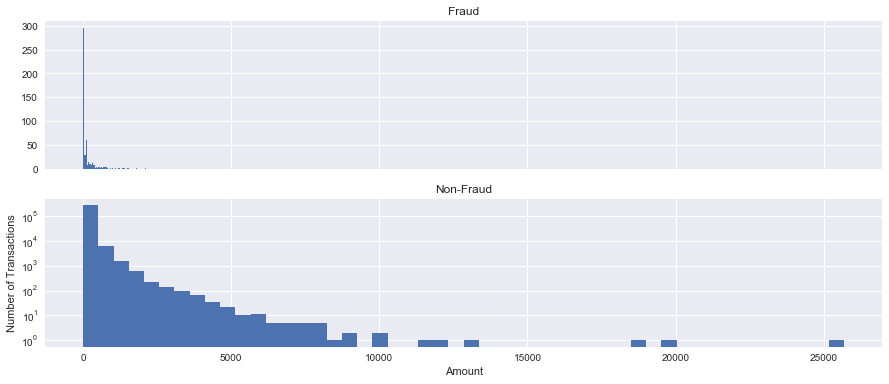

In [8]:
f, (x, y) = plt.subplots(2, 1, sharex=True, figsize=(15,6))
bins = 50
x.hist(mydataset.Amount[mydataset.Class == 1], bins = bins)
y.hist(mydataset.Amount[mydataset.Class == 0], bins = bins)

x.set_title('Fraud')
y.set_title('Non-Fraud')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

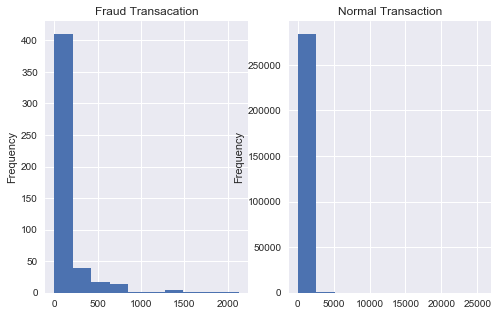

In [9]:
Fraud_transacation = mydataset[mydataset["Class"]==1]
NonFraud_transacation= mydataset[mydataset["Class"]==0]
plt.figure(figsize=(8,5))
plt.subplot(121)
Fraud_transacation.Amount.plot.hist(title="Fraud Transacation")
plt.subplot(122)
NonFraud_transacation.Amount.plot.hist(title="Normal Transaction")

Based on the graph;The distribution of data in non-fraud is not clear. It seem like all the non-fraud transactiona are less the 2.5k.

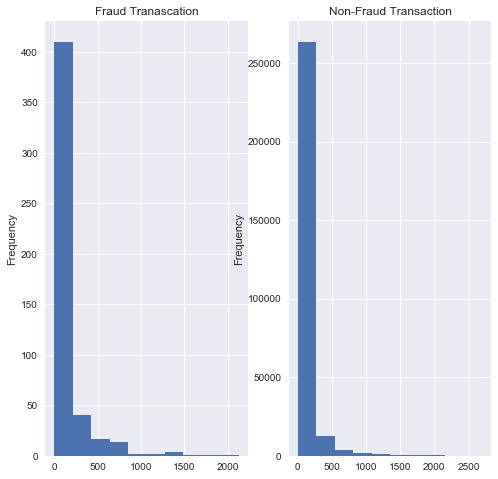

In [11]:
Fraud_transacation = mydataset[mydataset["Class"]==1]
NonFraud_transacation= mydataset[mydataset["Class"]==0]
plt.figure(figsize=(8,8))
plt.subplot(121)
Fraud_transacation[Fraud_transacation["Amount"]<= 2700].Amount.plot.hist(title="Fraud Tranascation")
plt.subplot(122)
NonFraud_transacation[NonFraud_transacation["Amount"]<=2700].Amount.plot.hist(title="Non-Fraud Transaction")

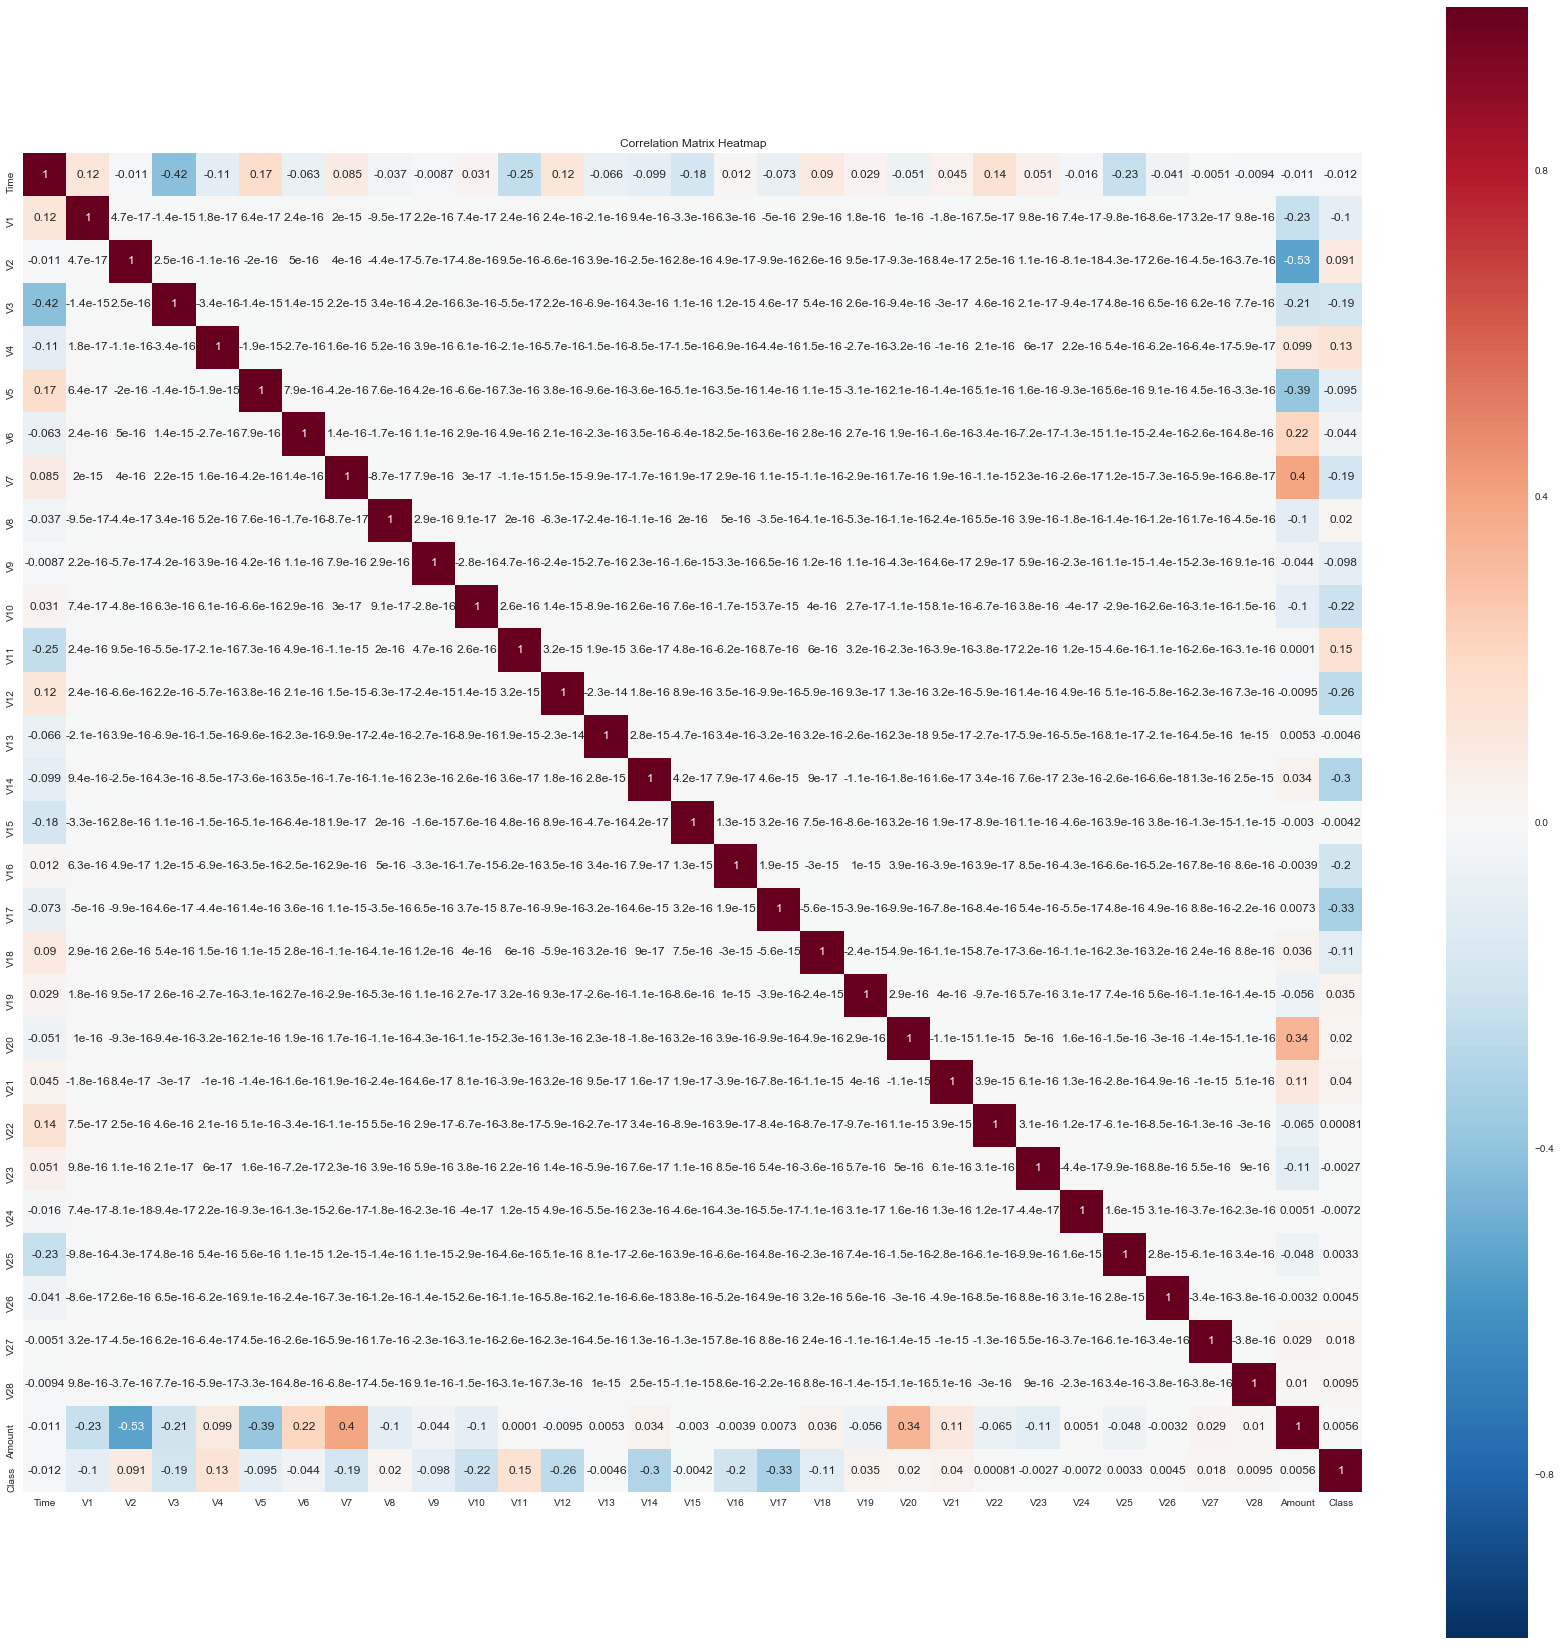

In [12]:
fig = plt.figure(figsize=(30,30))
corr = mydataset.corr()
sns.heatmap(corr, vmax=1, square=True,annot=True)
sns.plt.title('Correlation Matrix Heatmap')

In [32]:
mydataset.groupby(("Class")).mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [33]:
mydataset.mean()

Time      9.481386e+04
V1        3.919560e-15
V2        5.688174e-16
V3       -8.769071e-15
V4        2.782312e-15
V5       -1.552563e-15
V6        2.010663e-15
V7       -1.694249e-15
V8       -1.927028e-16
V9       -3.137024e-15
V10       1.768627e-15
V11       9.170318e-16
V12      -1.810658e-15
V13       1.693438e-15
V14       1.479045e-15
V15       3.482336e-15
V16       1.392007e-15
V17      -7.528491e-16
V18       4.328772e-16
V19       9.049732e-16
V20       5.085503e-16
V21       1.537294e-16
V22       7.959909e-16
V23       5.367590e-16
V24       4.458112e-15
V25       1.453003e-15
V26       1.699104e-15
V27      -3.660161e-16
V28      -1.206049e-16
Amount    8.834962e+01
Class     1.727486e-03
dtype: float64

In [13]:
fraud = mydataset[mydataset.Class == 1]
nonfraud= mydataset[mydataset.Class ==0 ]
print('Genuine Transaction ='+str(len(nonfraud)))
print('Fraud Transaction ='+str(len(fraud)))

Genuine Transaction =284315
Fraud Transaction =492


In [14]:
print('#######-----Fraud----###')
print (mydataset.Time[mydataset.Class == 1].describe())
print('---------')
print ("######------Non-Fraud-----###")
print (mydataset.Time[mydataset.Class == 0].describe())

#######-----Fraud----###
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64
---------
######------Non-Fraud-----###
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


#### Data Visulaization

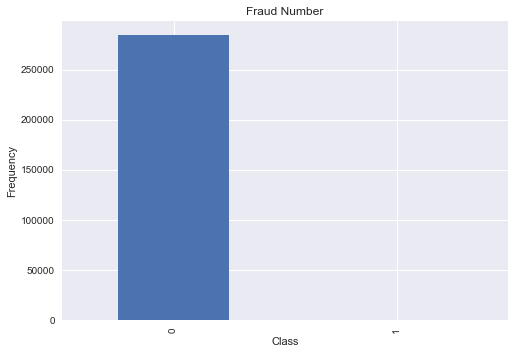

In [15]:
value = pd.value_counts(mydataset['Class'],sort=True).sort_index()
value.plot(kind = 'bar')
plt.title('Fraud Number')
plt.xlabel('Class')
plt.ylabel('Frequency')

In [48]:
mydataset.groupby(["Amount","Class"]).mean()

Time         V1         V2         V3         V4  \
Amount   Class                                                              
0.00     0       89208.927697   0.101386   0.269074   0.606083   1.805266   
         1      100142.777778  -3.094881   3.223141  -5.846313   5.413728   
0.01     0       81959.054698  -0.568196   0.410580   0.583500   0.026995   
         1      108844.600000  -8.106526   7.137760 -10.283143   5.867211   
0.02     0       87315.576471   0.170367  -0.274388   0.966057  -1.299248   
0.03     0       99923.333333  -0.327433  -0.505556   0.237874  -1.734726   
0.04     0       91373.000000  -0.336613  -0.782633   0.676427   0.351779   
0.05     0       97792.795455   0.720976  -0.324505   0.575280  -0.503867   
0.06     0      100055.666667   0.280351  -0.631198   0.872354   2.105272   
0.07     0       95949.363636  -0.661041   0.596986   0.755066  -0.126917   
0.08     0      123463.200000  -0.270564   1.085062  -1.188690  -0.539230   
0.09     0       79243.500000   0.294197   0.579213   0.860091  -0.260245   
0.10     0       99449.647059   0.168949  -0.190344   0.342334  -0.472706   
0.11     0       78123.086957  -0.363593  -0.423184   0.140828  -0.156359   
0.12     0      106252.559829   0.524513   0.441061   0.417550   0.302593   
0.13     0       94869.400000   0.104466   0.566725   0.511901  -0.426618   
0.14     0       74189.400000   0.269757   0.960737   0.378975   1.260389   
0.15     0      105084.315789  -0.169206   0.984781  -0.328859  -0.466467   
0.16     0      110600.500000  -0.326951   1.374010  -0.279482   0.211618   
0.17     0       72825.428571   0.619894   0.723221   0.002693   1.166964   
0.18     0      163944.000000  -5.255114   4.953862  -5.306732  -0.338475   
0.19     0       99229.750000  -0.102992   0.595286   0.104316  -0.407601   
0.20     0       86217.500000   0.700695  -0.328210   0.381169   0.742509   
         1       79540.000000  -0.114361   1.036129   1.984405   3.128243   
0.22     0       95733.083333  -0.681443   1.007558  -0.038134  -0.899296   
0.23     0      104118.921569  -1.048461   1.173918  -0.431637  -1.115235   
0.24     0       85748.200000   0.027563   0.918449  -0.177947   0.120174   
0.25     0       50691.200000   0.303935   0.726180   0.864666   1.212943   
0.26     0       65706.000000   1.530950  -0.037037  -0.572374  -0.128446   
0.27     0       74275.571429   0.578088   0.775807  -0.049909   1.024051   
...                       ...        ...        ...        ...        ...   
6454.74  0      132779.000000  -4.389647  -1.993089 -12.627453   0.282311   
6511.00  0       43684.000000 -12.618406 -16.550248  -7.779531   2.245844   
6652.89  0      128701.000000 -19.780626 -25.663628 -10.865410   6.046025   
6669.00  0       41978.000000 -11.839743 -17.711661  -6.893572   4.385610   
6828.00  0      141031.000000 -11.128890 -22.632193  -9.398485   5.163725   
6900.47  0      149657.000000 -11.448790 -21.749060  -8.478933   9.477565   
6950.51  0       38763.000000 -14.711825 -23.250844  -7.631400   5.975826   
6982.67  0      140335.000000 -11.446245 -17.964561 -10.768507   4.912280   
6998.00  0      145548.000000 -11.316807 -22.225978 -10.723514   5.827606   
7367.00  0      145630.000000 -32.543140 -50.383269 -10.733302   9.571705   
7429.15  0       32605.000000 -23.383129 -18.098804 -20.195367   4.249104   
7541.70  0      141546.000000 -13.396920 -19.230653  -9.042012   5.678408   
7583.32  0      133971.000000 -10.950173 -13.359133 -10.664755   1.157565   
7636.30  0       47807.000000 -13.537461 -24.426864  -7.355943   6.896486   
7712.43  0        1264.000000 -11.140706  -9.612726 -12.389545   6.013346   
7766.60  0      128027.000000 -12.895214 -20.492129 -12.794629   4.691974   
7862.39  0      150726.000000 -13.099603 -25.434451 -11.921912   4.976147   
7879.42  0       30537.000000 -14.191832 -25.313252  -7.578781   7.730844   
8182.70  0      145381.000000 -13.710746 -21.177912  -9.340628   8.385815   
8360.00  0      14475

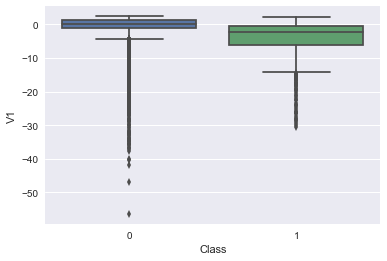

In [49]:
sns.boxplot(x="Class", y="V1", data=mydataset)

In [56]:
# Number of data points in the minority class && Indices Picking
number_records_fraud = len(mydataset[mydataset.Class == 1]) #492 Fraud Cases
fraud_indices = np.array(mydataset[mydataset.Class == 1].index)
print("Number of Fraud Cases: ", number_records_fraud)


# Number of data points in the majority class && Indices Picking
number_records_normal = len(mydataset[mydataset.Class != 1])
normal_indices = mydataset[mydataset.Class == 0].index
print("Number of Normal Cases: ", number_records_normal)

# Get fraud Transactions by Filtering
df_fraud = mydataset.iloc[fraud_indices] 
X_fraud = df_fraud.ix[:,df_fraud.columns != 'Class']
y_fraud = df_fraud.ix[:,df_fraud.columns == 'Class']

# Get Normal Transactions by Filtering
df_normal = mydataset.iloc[normal_indices] #Get normal Transaction by Filtering
X_normal = df_normal.ix[:,df_normal.columns != 'Class']
y_normal = df_normal.ix[:,df_normal.columns == 'Class']

# Make X,y for classfication
X = mydataset.ix[:, mydataset.columns != 'Class']
yy = mydataset.ix[:, mydataset.columns == 'Class']
y = np.asarray(yy['Class'])

('Number of Fraud Cases: ', 492)
('Number of Normal Cases: ', 284315)


/Users/sdhankhad/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
/Users/sdhankhad/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/Users/sdhankhad/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [57]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE's
kind = 'regular'
sm = SMOTE(kind='regular')
X_res, y_res = sm.fit_sample(X, y)

print("esampled Dataset has shape: ", X_res.shape)
print("Total number of case of Real&duplicate ", np.sum(y_res))

('esampled Dataset has shape: ', (568630, 30))
('Total number of case of Real&duplicate ', 284315)


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)
print("Training and testing split was successful.")
print('Training set volume:', X_train.shape[0])
print('Test set volume:', X_test.shape[0])
print("Total number of transactions: ", len(X_train)+len(X_test))

X_train_res, X_test_res, y_train_res, y_test_res= train_test_split(X_res, y_res)

print("")
print("Number transactions train dataset: ", len(X_train_res))
print("Number transactions test dataset: ", len(X_test_res))
print("Total number of transactions: ", len(X_train_res)+len(X_test_res))


Training and testing split was successful.
('Training set volume:', 213605)
('Test set volume:', 71202)
('Total number of transactions: ', 284807)

('Number transactions train dataset: ', 426472)
('Number transactions test dataset: ', 142158)
('Total number of transactions: ', 568630)


###### It's good idea to calculate score for training and test, reasons are: 1-It's often a good sign that your training and test scores are relatively close 2-It's very useful for deciding how to improve your model. 3- looking at the training score can help you prevent overfitting. 4- The higher the score is, the better the model is performing. I took

In [59]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
53908,46209.0,0.955415,-2.328167,1.031509,-0.784198,-2.338034,0.667218,-1.565433,0.301711,-0.557636,...,0.054105,-0.309020,-0.637152,-0.181673,0.011049,0.265606,-0.229697,0.044695,0.053261,240.00
68720,53113.0,1.215190,-0.035121,0.656983,0.854078,-0.748339,-0.680118,-0.181843,-0.037042,0.695180,...,-0.181357,-0.309024,-0.782227,0.086961,0.372563,0.298658,0.184168,-0.022958,0.015322,9.99
186343,127060.0,2.006044,0.247561,-1.694300,0.531367,0.303929,-1.396038,0.396023,-0.465260,0.350053,...,-0.066663,0.233101,0.881354,-0.052336,-0.032946,0.282884,-0.105978,0.006788,-0.024392,25.98
81312,58883.0,0.730288,-0.593417,0.869110,1.452010,-0.733676,0.496915,-0.226923,0.203716,0.456593,...,0.223017,0.164358,0.418328,-0.235506,0.280863,0.508165,-0.298084,0.043694,0.047977,183.45
164153,116498.0,-4.576752,3.993802,-1.026104,-1.552478,-1.119700,-0.981951,-0.339005,0.858685,2.822631,...,1.281725,-0.415649,-0.846739,0.223516,-0.283476,0.318457,-0.267537,0.565918,0.811718,2.23


In [60]:
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
271575,164637.0,-1.460580,-0.548776,-2.255496,1.598256,2.414101,-2.515782,0.410781,-0.179026,-0.681475,...,-0.223606,0.533968,1.632291,-0.754111,0.034839,-1.244220,-0.377695,0.698558,-0.184300,1.00
58909,48607.0,-0.501223,0.592896,1.623508,0.554278,-0.142976,-0.534477,0.429888,-0.088642,-0.053723,...,0.045312,-0.150249,-0.309670,0.070205,0.432688,-0.618289,0.266832,-0.004588,0.191608,23.95
239739,150239.0,1.922374,0.365652,-2.718601,0.354698,1.468157,0.316214,0.015444,0.204622,0.302116,...,-0.224809,0.186913,0.809064,-0.052618,-1.849289,0.093556,0.011881,0.064430,-0.019748,1.00
172881,121282.0,1.763905,-0.727436,-1.775673,0.266421,1.848918,4.004766,-0.996905,1.024960,0.730936,...,0.022792,0.279915,0.635408,0.094092,0.692211,-0.084395,-0.551044,0.058856,-0.019882,100.00
41755,40813.0,1.048521,0.233031,1.642772,2.740068,-0.739730,0.439682,-0.588824,0.253781,0.015542,...,-0.165495,-0.028524,0.115029,0.104511,0.401690,0.194135,-0.035692,0.061752,0.037533,6.06


In [61]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(X_train_res,y_train_res)
testscoreLR=accuracy_score(y_test_res,lr.predict(X_test_res))
print('logistic regression accuracy score:'+str(testscoreLR))
print(confusion_matrix(y_test_res,lr.predict(X_test_res)))
print(classification_report(y_test_res,lr.predict(X_test_res)))

logistic regression accuracy score:0.966298062719
[[69996  1097]
 [ 3694 67371]]
             precision    recall  f1-score   support

          0       0.95      0.98      0.97     71093
          1       0.98      0.95      0.97     71065

avg / total       0.97      0.97      0.97    142158



In [62]:
#Decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=3)
dt.fit(X_train_res,y_train_res)
testscoreDT=accuracy_score(y_test_res,dt.predict(X_test_res))
print('Decision Tree accuracy score:'+str(testscoreDT))
print(confusion_matrix(y_test_res,dt.predict(X_test_res)))
print(classification_report(y_test_res,dt.predict(X_test_res)))

Decision Tree accuracy score:0.96307629539
[[70245   848]
 [ 4401 66664]]
             precision    recall  f1-score   support

          0       0.94      0.99      0.96     71093
          1       0.99      0.94      0.96     71065

avg / total       0.96      0.96      0.96    142158



In [63]:
#Decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=8)
dt.fit(X_train_res,y_train_res)
testscoreDT=accuracy_score(y_test_res,dt.predict(X_test_res))
print('Decision Tree accuracy score:'+str(testscoreDT))
print(confusion_matrix(y_test_res,dt.predict(X_test_res)))
print(classification_report(y_test_res,dt.predict(X_test_res)))

Decision Tree accuracy score:0.985192532253
[[70078  1015]
 [ 1090 69975]]
             precision    recall  f1-score   support

          0       0.98      0.99      0.99     71093
          1       0.99      0.98      0.99     71065

avg / total       0.99      0.99      0.99    142158



In [64]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100)
rf.fit(X_train_res,y_train_res)
testscoreRF=accuracy_score(y_test_res,rf.predict(X_test_res))
print('Random Forest accuracy score:'+str(testscoreRF))

Random Forest accuracy score:0.999845242617


In [66]:
print(confusion_matrix(y_test_res,rf.predict(X_test_res)))
print(classification_report(y_test_res,rf.predict(X_test_res)))

[[71076    17]
 [    5 71060]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71093
          1       1.00      1.00      1.00     71065

avg / total       1.00      1.00      1.00    142158



In [67]:
#Gaussian navie bayers
nb=GaussianNB()
nb.fit(X_train_res,y_train_res)
testscoreNB=accuracy_score(y_test_res,nb.predict(X_test_res))
print('Decision Tree accuracy score:'+str(testscoreNB))
print(confusion_matrix(y_test_res,nb.predict(X_test_res)))
print(classification_report(y_test_res,nb.predict(X_test_res)))

Decision Tree accuracy score:0.869089323147
[[70566   527]
 [18083 52982]]
             precision    recall  f1-score   support

          0       0.80      0.99      0.88     71093
          1       0.99      0.75      0.85     71065

avg / total       0.89      0.87      0.87    142158



In [68]:
#KNN
kn=KNeighborsClassifier()
kn.fit(X_train_res,y_train_res)
testscoreKN=accuracy_score(y_test_res,kn.predict(X_test_res))
print('Decision Tree accuracy score:'+str(testscoreKN))
print(confusion_matrix(y_test_res,kn.predict(X_test_res)))
print(classification_report(y_test_res,kn.predict(X_test_res)))

Decision Tree accuracy score:0.961296585489
[[67199  3894]
 [ 1608 69457]]
             precision    recall  f1-score   support

          0       0.98      0.95      0.96     71093
          1       0.95      0.98      0.96     71065

avg / total       0.96      0.96      0.96    142158



In [78]:
from sklearn.ensemble import GradientBoostingClassifier
gbm0 = GradientBoostingClassifier(random_state=10)
gbm0.fit(X_train_res,y_train_res)
testscoreGBM=accuracy_score(y_test_res,gbm0.predict(X_test_res))
print('Decision Tree accuracy score:'+str(testscoreGBM))
print(confusion_matrix(y_test_res,gbm0.predict(X_test_res)))
print(classification_report(y_test_res,gbm0.predict(X_test_res)))

Decision Tree accuracy score:0.98797816514
[[70692   401]
 [ 1308 69757]]
             precision    recall  f1-score   support

          0       0.98      0.99      0.99     71093
          1       0.99      0.98      0.99     71065

avg / total       0.99      0.99      0.99    142158



In [69]:
#Arrrange the model according tp there accuracy score
models = pd.DataFrame({'Model' : [ 'random Forest', 'Decision Tree', 'Logistic Regression', 'KNN Regression','Gaussian Naive Bays'],'Testing_Score' : [ testscoreRF, testscoreDT, testscoreLR, testscoreKN, testscoreNB],})
models.sort_values(by='Testing_Score', ascending=False)

,Model,Testing_Score
0,random Forest,0.999845
1,Decision Tree,0.985193
2,Logistic Regression,0.966298
3,KNN Regression,0.961297
4,Gaussian Naive Bays,0.869089


In [85]:
#using Random Forest
importances=rf.feature_importances_
f=np.argsort(importances)[::1]
print ('feature ranking:')
for i in range(x.shape[1]):
     print ("feature no. {}: {} ({})".format(i+1,x.columns[f[i]],importances[f[i]]))

feature ranking:


AttributeError: 'AxesSubplot' object has no attribute 'shape'

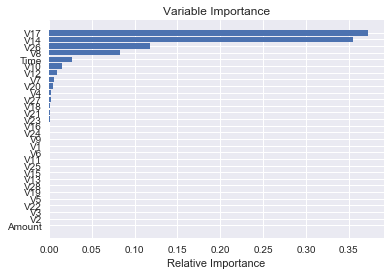

In [92]:
from sklearn import ensemble

deci = ensemble.GradientBoostingClassifier()
deci.fit(mydataset.iloc[:, 0:30], mydataset.Class)
importances = deci.feature_importances_
sorted_idx = np.argsort(importances)

padding = np.arange(30) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, mydataset.columns[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

In [ ]:
from sklearn import ensemble

deci = ensemble.LogisticRegression()
deci.fit(mydataset.iloc[:, 0:30], mydataset.Class)
importances = deci.feature_importances_
sorted_idx = np.argsort(importances)

padding = np.arange(30) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, mydataset.columns[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

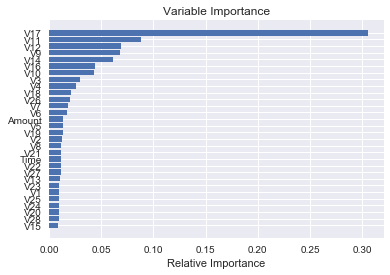

In [98]:
from sklearn import ensemble

deci = ensemble.RandomForestClassifier()
deci.fit(mydataset.iloc[:, 0:30], mydataset.Class)
importances = deci.feature_importances_
sorted_idx = np.argsort(importances)

padding = np.arange(30) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, mydataset.columns[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

In [26]:
y_pred = lr.predict(X_test_res)
y_prob = lr.predict_proba(X_test_res)

In [27]:
y1_pred = dt.predict(X_test_res)
y1_prob = dt.predict_proba(X_test_res)
y2_prob = rf.predict_proba(X_test_res)
y3_prob = nb.predict_proba(X_test_res)
y4_prob = kn.predict_proba(X_test_res)

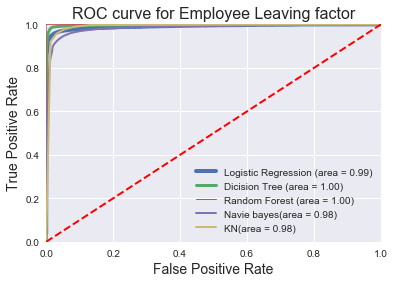

In [28]:
from sklearn.metrics import roc_curve, auc
# area under the curve
Falsepositive, truepositive,_ = (roc_curve(y_test_res,y_prob[:,1]))
FalsepositiveDT, truepositiveDT,_ = (roc_curve(y_test_res,y1_prob[:,1]))
FalsepositiveRF, truepositiveRF,_ = (roc_curve(y_test_res,y2_prob[:,1]))
FalsepositiveNB, truepositiveNB,_ = (roc_curve(y_test_res,y3_prob[:,1]))
FalsepositiveKN, truepositiveKN,_ = (roc_curve(y_test_res,y4_prob[:,1]))
ROC_AUCLR = auc(Falsepositive, truepositive)
ROC_AUCDT = auc(FalsepositiveDT, truepositiveDT)
ROC_AUCRF = auc(FalsepositiveDT, truepositiveDT)
ROC_AUCNB = auc(FalsepositiveNB, truepositiveNB)
ROC_AUCKN = auc(FalsepositiveKN, truepositiveKN)
#Plottig
plt.plot(Falsepositive, truepositive, label='Logistic Regression (area = %0.2f)' % ROC_AUCLR, linewidth=4)
plt.plot(FalsepositiveDT, truepositiveDT, label='Dicision Tree (area = %0.2f)' % ROC_AUCDT, linewidth=3)
plt.plot(FalsepositiveRF, truepositiveRF, label='Random Forest (area = %0.2f)' % ROC_AUCRF, linewidth=1)
plt.plot(FalsepositiveNB, truepositiveNB, label='Navie bayes(area = %0.2f)' % ROC_AUCNB, linewidth=2)
plt.plot(FalsepositiveKN, truepositiveKN, label='KN(area = %0.2f)' % ROC_AUCNB, linewidth=2)
plt.plot([0, 1], [0, 1], 'r--', linewidth=2)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC curve for Employee Leaving factor', fontsize=16)
plt.legend(loc="lower right")
plt.show()

In [24]:
test_predict = X_test.iloc[0:10,:] # you can change the 10 to any number you want till 14999
realpr = dt.predict(test_predict) # we are using real prediction value
for i in realpr:
    print (i)

1
0
0
0
0
0
0
0
0
0


In [34]:
y_test.iloc[0:100] 

43428     1
49906     0
29474     0
276481    0
278846    0
101565    0
260880    0
214337    0
201575    0
81055     0
134976    0
237701    0
256836    0
97650     0
158290    0
246697    0
68279     0
267585    0
26525     0
74422     0
206357    0
257395    0
283656    0
231156    0
38442     0
225485    0
92410     0
10828     0
61461     0
134354    0
         ..
210194    0
177473    0
81436     0
104674    0
102058    0
237523    0
51750     0
93581     0
228491    0
217792    0
276741    0
71345     0
234744    0
7730      0
35730     0
24338     0
44942     0
80953     0
212975    0
209862    0
91821     0
208257    0
185213    0
265204    0
188412    0
11648     0
252178    0
162203    0
221033    0
147106    0
Name: Class, Length: 100, dtype: int64